In [1]:
#Subway surfaces microbiota analysis, beta and alpha diversity analysis
library(ggplot2)
library(vegan)
library(phyloseq)
library (ape)
library(phytools)

data= read.table("metadata_R117.txt", header=T, row.names=1, sep="\t") # metadata

load("RData/rmetro6242.RData") # load phyloseq object at OTU level rarified to 6,242 seqs/sample
rmetro6242->rmetro

load("RData/grmetro.RData") #rarified and collapsed to genus level
grmetro

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”Warning message:
“package ‘vegan’ was built under R version 3.5.2”Loading required package: permute
Warning message:
“package ‘permute’ was built under R version 3.5.2”Loading required package: lattice
This is vegan 2.5-5
Loading required package: maps


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 934 taxa and 89 samples ]
sample_data() Sample Data:       [ 89 samples by 84 sample variables ]
tax_table()   Taxonomy Table:    [ 934 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 934 tips and 933 internal nodes ]

In [3]:
rmetro

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 29690 taxa and 89 samples ]
sample_data() Sample Data:       [ 89 samples by 84 sample variables ]
tax_table()   Taxonomy Table:    [ 29690 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 29690 tips and 29689 internal nodes ]

Warning message:
“Removed 90 rows containing missing values (geom_errorbar).”

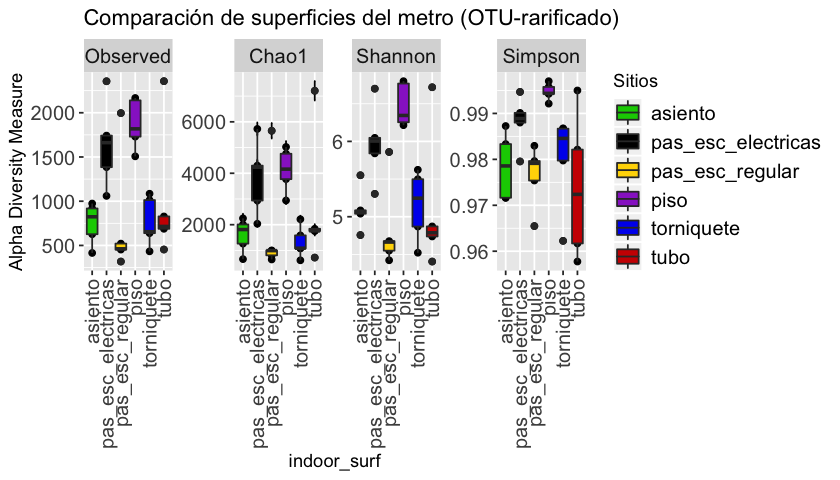

In [8]:
#Comparison among subway sites
#subseting sites
sites=subset_samples(rmetro, biome=="urban"  & site=="y" & wagons_type=="mixed") 

#Alpha diversity of sites at OTU level
A=plot_richness(sites, x = "indoor_surf", measures = c("Observed","Chao1", "Shannon","Simpson"))
A+ geom_boxplot(aes(fill = indoor_surf))+
scale_fill_manual(values = c( "green3", "black","gold", "darkorchid", "blue2", 
                             "red3", "gray", "pink","khaki2", "firebrick", "brown1", "royalblue2"), 
                       name="Sitios")+
theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text=element_text(size=12),
      legend.text=element_text(size=12),strip.text.x = element_text(size = 12))+
labs(title="Comparación de superficies del metro (OTU-rarificado)")



In [12]:
#Statistical analysis of diversity in samples rarified at 4,242 seqs/sample (not 6,230)
si=subset(data, data$biome=="urban")
si=subset(si, si$site=="y")
si=subset(si, wagons_type=="mixed")

lapply(si[,7:10], function(x) {
  k=kruskal.test(x ~ si$indoor_surf)
  pv=round(k$p.value, 4)
  return(pv)
})


$observed_6230
[1] 0.0132

$chao1_6230
[1] 0.024

$shannon_6230
[1] 0.0034

$simpson_6230
[1] 0.0088

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 934 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 84 sample variables ]
tax_table()   Taxonomy Table:    [ 934 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 934 tips and 933 internal nodes ]

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1031457 
Run 1 stress 0.1279258 
Run 2 stress 0.1040083 
Run 3 stress 0.1032097 
... Procrustes: rmse 0.05078706  max resid 0.2179222 
Run 4 stress 0.1204123 
Run 5 stress 0.1135955 
Run 6 stress 0.1032098 
... Procrustes: rmse 0.05079194  max resid 0.2179265 
Run 7 stress 0.1274538 
Run 8 stress 0.1200137 
Run 9 stress 0.1025883 
... New best solution
... Procrustes: rmse 0.04928084  max resid 0.2179488 
Run 10 stress 0.1267081 
Run 11 stress 0.1285492 
Run 12 stress 0.1295371 
Run 13 stress 0.1231981 
Run 14 stress 0.1226824 
Run 15 stress 0.1025883 
... New best solution
... Procrustes: rmse 1.421729e-05  max resid 4.83661e-05 
... Similar to previous best
Run 16 stress 0.3915179 
Run 17 stress 0.1250912 
Run 18 stress 0.1175702 
Run 19 stress 0.1148925 
Run 20 stress 0.120319 
*** Solution reached



Call:
adonis(formula = dist ~ indoor_surf, data = sampledf) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

            Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
indoor_surf  5    1.4234 0.28469  2.6834 0.35858  0.001 ***
Residuals   24    2.5462 0.10609         0.64142           
Total       29    3.9697                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)  
Groups     5 0.14904 0.0298078 3.4394    999  0.021 *
Residuals 24 0.20800 0.0086667                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

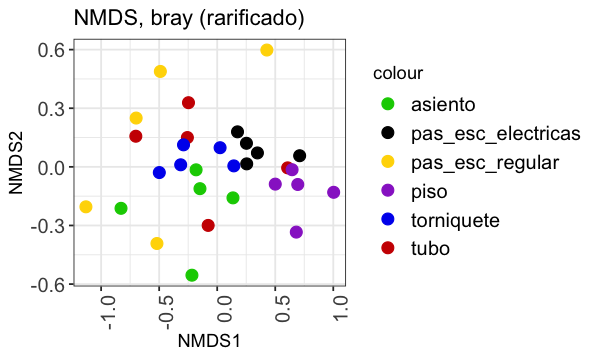

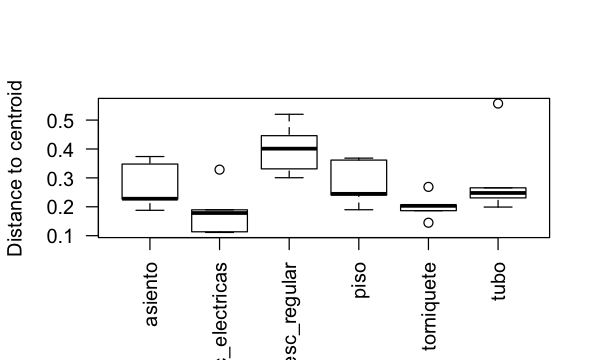

In [6]:
#Beta diversity plots and analyses in samples rarified at 4,242 seqs/sample at genus level
#subseting sites
sites_g=subset_samples(grmetro, biome=="urban" & site=="y" & wagons_type=="mixed") 

sites_g
rcle_ordu= ordinate(sites_g, "NMDS", "bray", weighted=F)
options(repr.plot.width=5, repr.plot.height=3)

p = plot_ordination(sites_g, rcle_ordu) 
p = p + geom_point(aes(color = indoor_surf), size=3 )
p = p + scale_colour_manual(values = c( "green3", "black","gold", "darkorchid", "blue2", 
                             "red3", "gray", "pink","khaki2", "firebrick", "brown1", "royalblue2"))+
theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text=element_text(size=12),
      legend.text=element_text(size=12),strip.text.x = element_text(size = 12),panel.background = element_blank())+
labs(title="NMDS, bray (rarificado)")

p

# Calculate distance matrix at OTU level
dist <- phyloseq::distance(sites_g, method = "bray")
# make a data frame from the sample_data
sampledf <- data.frame(sample_data(sites_g))
# Adonis test
adonis(dist ~ indoor_surf, data = sampledf)

# Homogeneity of dispersion test
beta <- betadisper(dist, sampledf$indoor_surf)

beta <- betadisper(dist, sampledf$indoor_surf)
permutest(beta)

boxplot(beta, las=2)



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 934 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 84 sample variables ]
tax_table()   Taxonomy Table:    [ 934 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 934 tips and 933 internal nodes ]

[1] "g__Acinetobacter"     "g__Corynebacterium"   "g__Streptococcus"    
 [4] "g__Staphylococcus"    "g__Propionibacterium" "g__Kocuria"          
 [7] "g__Haemophilus"       "g__Prevotella"        "g__Brevibacterium"   
[10] "g__Pseudomonas"       "g__Enhydrobacter"     "g__Jeotgalicoccus"   
[13] "g__Deinococcus"       "g__"                  "g__Micrococcus"      
[16] "g__Erwinia"           "g__Leptotrichia"      "g__Actinomyces"      
[19] "g__Chryseobacterium"  "g__Gemella"           "g__Veillonella"      
[22] "g__Flavobacterium"    "g__Fusobacterium"     "g__Marinomonas"      
[25] "< 0.015 abund."

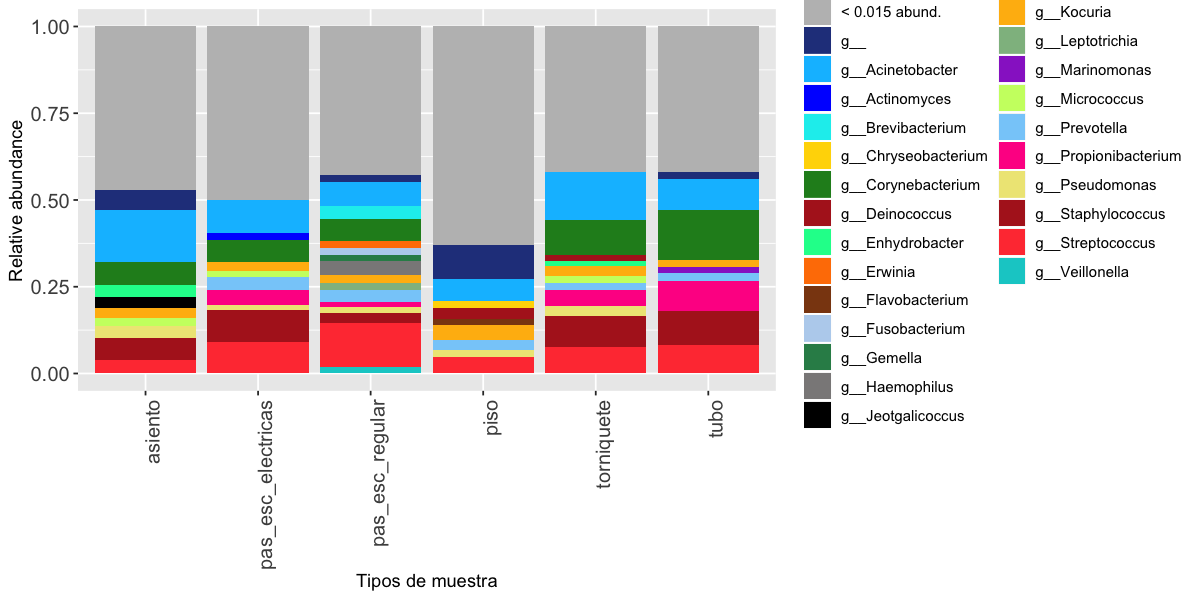

In [12]:
#Taxonomic summary at genus level by subway site

sites_g=subset_samples(grmetro, biome=="urban"  & site=="y") 
sexar=merge_samples(sites_g, "indoor_surf", fun=sum)

sexar_transf<-transform_sample_counts(sexar, function(OTU) OTU/sum(OTU))
#install.packages("tidyverse")
library(tidyverse)
sexar_genus <- tax_glom(sexar_transf, taxrank = 'Genus')
sexar_genus # should list # taxa as # phyla
sexar_g_genus<- psmelt(sexar_genus) # create dataframe from phyloseq object
sexar_g_genus$Genus <- as.character(sexar_g_genus$Genus) #convert to character

#simple way to rename genus with < 1.5% abundance
sexar_g_genus$Genus[sexar_g_genus$Abundance < 0.015] <- "< 0.015 abund."

unique(sexar_g_genus$Genus)
                                      
#plot with condensed phyla into "unknown" category
options(repr.plot.width=10, repr.plot.height=5)

p <- ggplot(data=sexar_g_genus, aes(x=Sample, y=Abundance, fill=Genus))
p + geom_bar(aes(), stat="identity", position="stack") +
scale_fill_manual(values = c("gray","royalblue4", "deepskyblue", "blue", "cyan2",
"gold1", "forestgreen", "firebrick", "mediumspringgreen", "darkorange1",
"saddlebrown", "slategray2", "seagreen", "snow4","black", "darkgoldenrod1", 
                             "darkseagreen", "darkorchid", "darkolivegreen1", "lightskyblue", "deeppink", 
                             "khaki2", "firebrick", "brown1", "cyan3", "royalblue2",
                             "darksalmon","darkseagreen", "green", "purple3","red", "green4", "pink" )) +
xlab("Sites") + ylab("Relative abundance")+
theme(legend.position="right", legend.text=element_text(size=9)) + guides(fill=guide_legend(nrow=15))+
theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text=element_text(size=12))
